In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
 

In [4]:
df = pd.read_csv(r"C:\Users\G Sai Madhav\Desktop\robotics\ML\logistic_regression\logistic_regression.csv")
df

,age,bought_ins
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


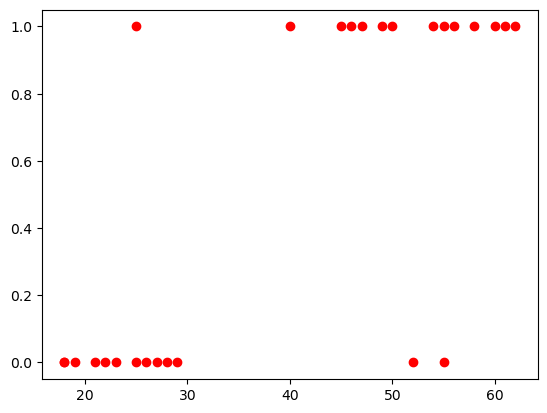

In [32]:
plt.scatter(df.age,df.bought_ins,color="red")


In [7]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_ins,test_size=0.1)

In [18]:
x_test

,age
2,47
25,54
18,19


In [19]:
x_train

,age
23,45
6,55
21,26
9,61
10,18
1,25
13,29
19,18
3,52
8,62


In [23]:
from sklearn import linear_model

reg = linear_model.LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
reg.predict(x_test)

array([1, 1, 0], dtype=int64)

In [26]:
reg.score(x_test,y_test)

1.0

In [3]:
 df1 = pd.read_csv(r"C:\Users\G Sai Madhav\Desktop\robotics\ML\logistic_regression\archive\HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='salary'>

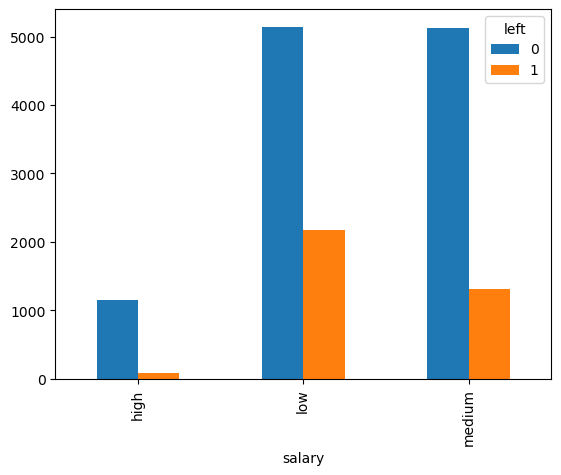

In [35]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

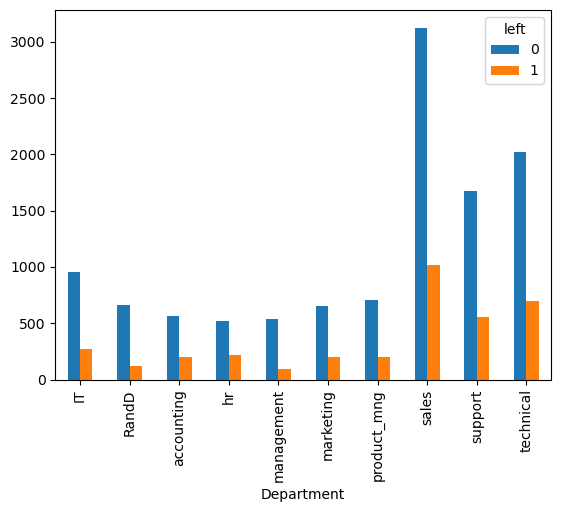

In [41]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

<AxesSubplot:xlabel='left'>

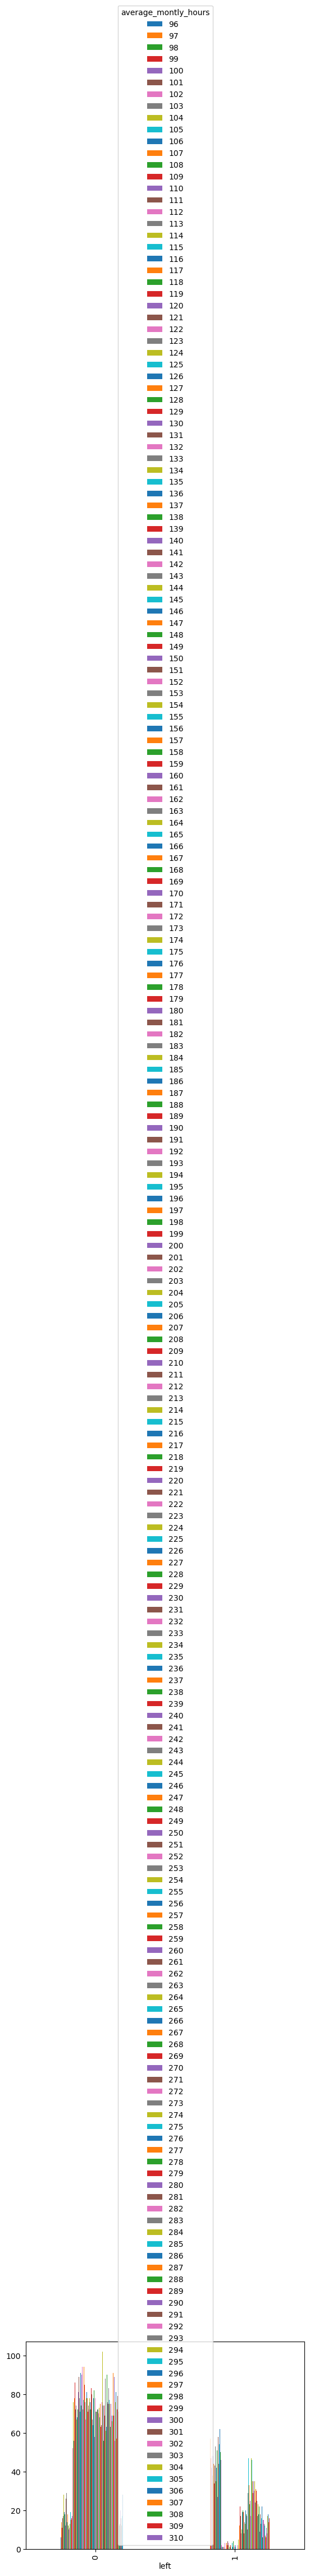

In [43]:
pd.crosstab(df1.left,df1.average_montly_hours).plot(kind='bar')

<AxesSubplot:xlabel='left'>

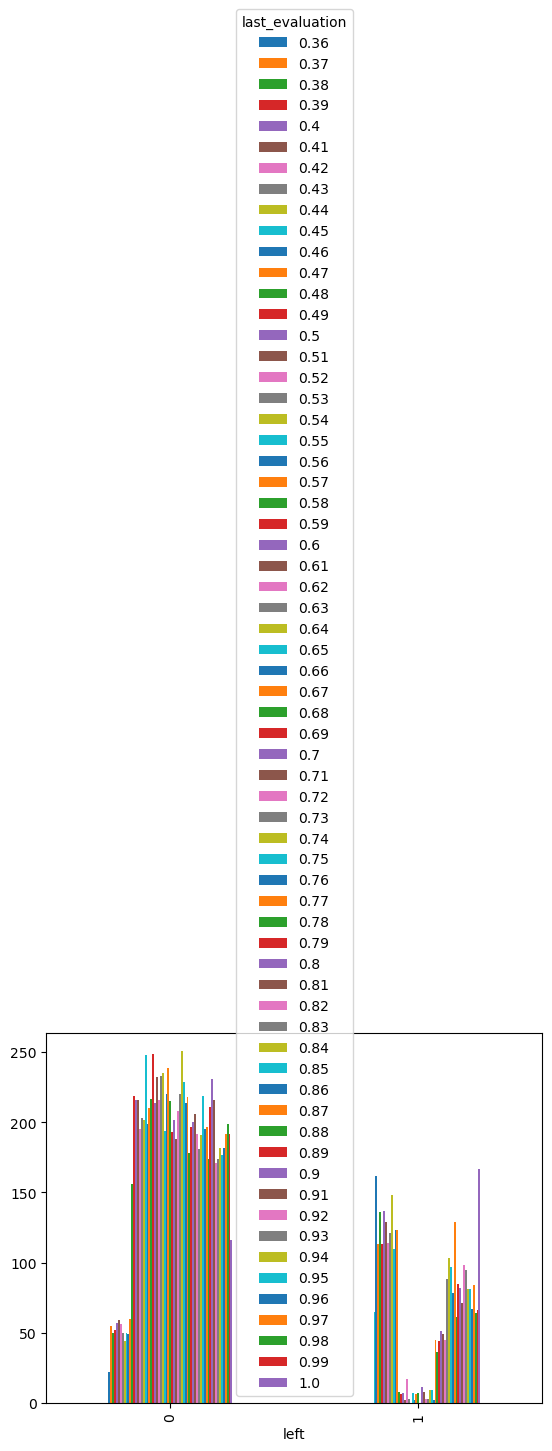

In [48]:
pd.crosstab(df1.left,df1.last_evaluation).plot(kind='bar')

<AxesSubplot:xlabel='left'>

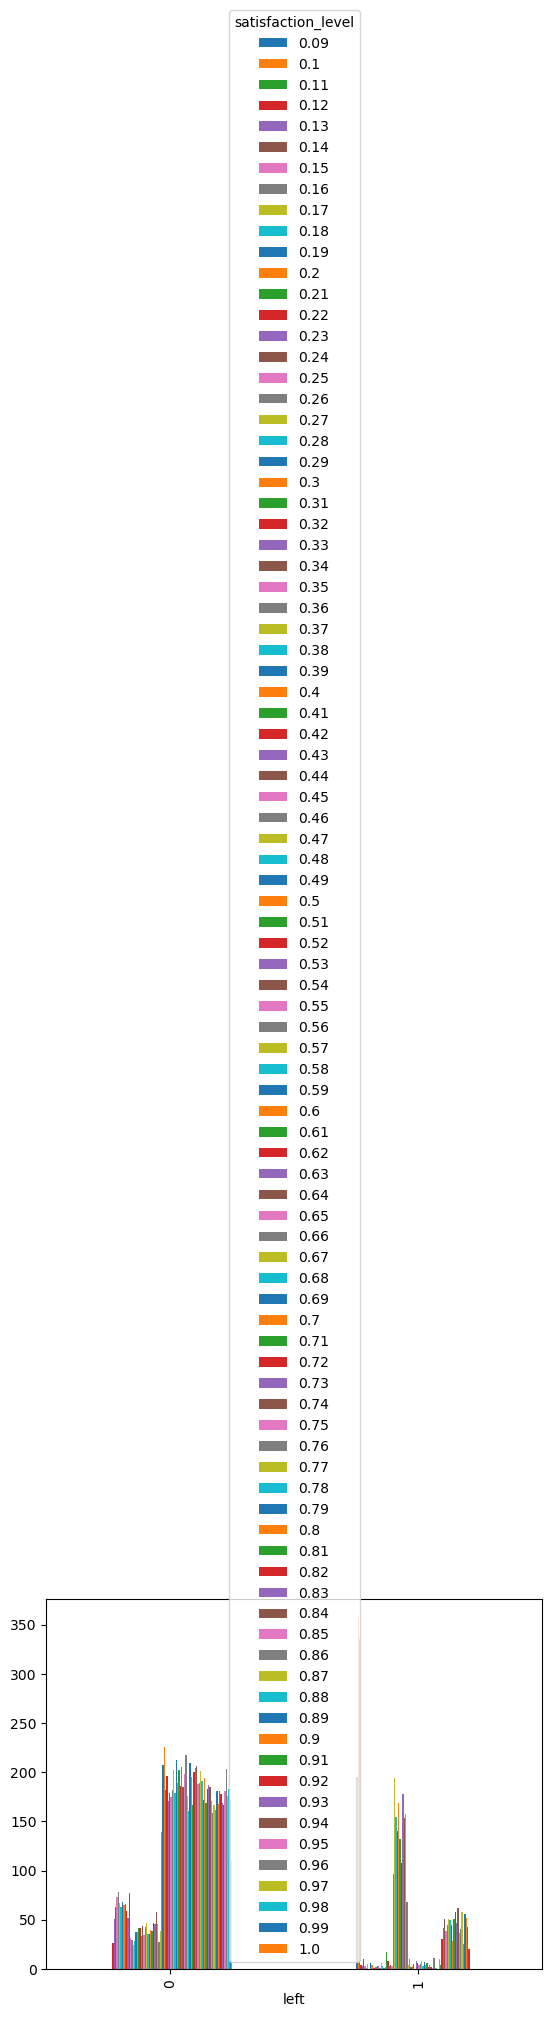

In [49]:
pd.crosstab(df1.left,df1.satisfaction_level).plot(kind='bar')

In [54]:
sdf = df1[['satisfaction_level','last_evaluation','promotion_last_5years','salary']]
sdf.head()

,satisfaction_level,last_evaluation,promotion_last_5years,salary
0,0.38,0.53,0,low
1,0.80,0.86,0,medium
2,0.11,0.88,0,medium
3,0.72,0.87,0,low
4,0.37,0.52,0,low


In [56]:
sdf_dum = pd.get_dummies(sdf.salary)
sdf_dum.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [57]:
sdf1 = pd.concat([sdf,sdf_dum],axis="columns")

In [59]:
sdf1.head()

,satisfaction_level,last_evaluation,promotion_last_5years,salary,high,low,medium
0,0.38,0.53,0,low,0,1,0
1,0.80,0.86,0,medium,0,0,1
2,0.11,0.88,0,medium,0,0,1
3,0.72,0.87,0,low,0,1,0
4,0.37,0.52,0,low,0,1,0


In [63]:
sdf1.drop(['salary','high'],axis="columns",inplace=True)
sdf1.head()

,satisfaction_level,last_evaluation,promotion_last_5years,low,medium
0,0.38,0.53,0,1,0
1,0.80,0.86,0,0,1
2,0.11,0.88,0,0,1
3,0.72,0.87,0,1,0
4,0.37,0.52,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sdf1,df1.left,train_size=0.3)

In [67]:
from sklearn.linear_model import LogisticRegression

reg2 = LogisticRegression()
reg2.fit(x_train,y_train)

LogisticRegression()

In [68]:
reg2.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
reg2.score(x_test,y_test)

0.7785714285714286